In [1]:
!pip install pulp

In [2]:
# Import PuLP for optimization
import pulp

# Import matplotlib for visualization
import matplotlib.pyplot as plt


In [3]:
# Create the Linear Programming problem
prob = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

# Define decision variables: how many units of A and B to produce
x_A = pulp.LpVariable('Product_A', lowBound=0, cat='Continuous')
x_B = pulp.LpVariable('Product_B', lowBound=0, cat='Continuous')

# Define objective function: maximize total profit
# Profit: $20 per unit A, $30 per unit B
prob += 20*x_A + 30*x_B, "Total_Profit"

# Define constraints
# 1. Raw material: 3 units A + 4 units B <= 100
prob += 3*x_A + 4*x_B <= 100, "Raw_Material_Limit"

# 2. Labor: 2 hours A + 3 hours B <= 80
prob += 2*x_A + 3*x_B <= 80, "Labor_Limit"


In [4]:
# Solve the LP problem
prob.solve()

# Print solution status
print("Status:", pulp.LpStatus[prob.status])


Status: Optimal


In [5]:
# Print the optimal production plan
print("Optimal Production Plan:")
print(f"Produce {x_A.varValue} units of Product A")
print(f"Produce {x_B.varValue} units of Product B")

# Maximum profit
print(f"Maximum Profit: ${pulp.value(prob.objective)}")


Optimal Production Plan:
Produce 0.0 units of Product A
Produce 25.0 units of Product B
Maximum Profit: $750.0


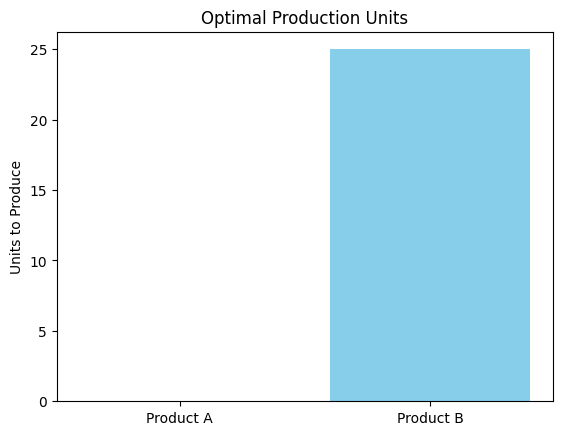

In [6]:
# Bar chart of optimal production units
products = ['Product A', 'Product B']
units = [x_A.varValue, x_B.varValue]

plt.bar(products, units, color='skyblue')
plt.title("Optimal Production Units")
plt.ylabel("Units to Produce")
plt.show()


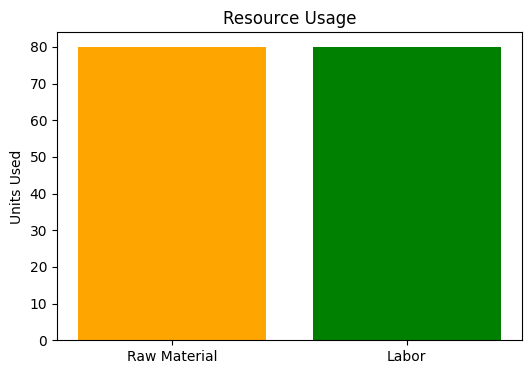

In [8]:
used_raw_material = sum([raw_material[i]*x[i].varValue for i in products])
used_labor = sum([labor[i]*x[i].varValue for i in products])

plt.figure(figsize=(6,4))
plt.bar(["Raw Material", "Labor"], [used_raw_material, used_labor], color=['orange', 'green'])
plt.title("Resource Usage")
plt.ylabel("Units Used")
plt.show()
